# Decision Tree

For this project we are going to use the flag dataset from the UCI Machine Learning Repository. The data set contains 200 rows and 30 columns. The data set contains the following features:

In [115]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Explore and Load Data

In [116]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
        'red','green','blue','gold','white','black','orange','mainhue','circles',
        'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

predictors = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']


We are going to focus in Europe and Oceania, so we are going to drop the other continents.

In [117]:
data = df[df['landmass'].isin([3,6])] # Creates a mask to filter the data
data.shape

(55, 30)

In [118]:
labels = (data['landmass'].isin([3,6]))*1 # This transforms the data into 0 and 1
labels.shape

(55,)

Since our mainhue is an object instead of a number, we are going to transform it into a dummy variable.

In [119]:
data = pd.get_dummies(data[predictors])
data.shape

(55, 22)

Now that are data is ready we are going to split it into training and testing data.

In [120]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=0)

# Tree tunning - Depth

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
acc_depth = []
for i in range(1, 20):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    acc_depth.append(tree.score(X_test, y_test))

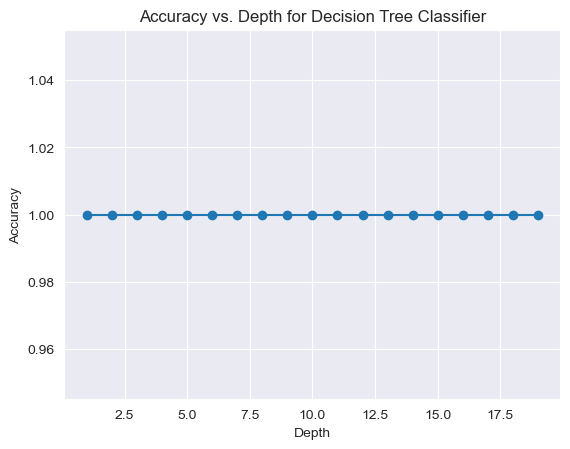

In [125]:
# Plot the accuracy scores vs. depth values
plt.plot(range(1, 20), acc_depth, 'o-')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Depth for Decision Tree Classifier')
plt.show()

Since the accuracy is the same for all the depths, we are going to use the default value.

In [127]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()